# Intro to NN

In [1]:
!pip install pandas scikit-learn

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Basic operations

![Simple Neuron](simple-neuron.png)

In [4]:
x1 = torch.tensor([0.1, 0.2], requires_grad=True)
x2 = torch.tensor([0.1, 0.1], requires_grad=True)
y = 3 * x1 + x2 + 1
output = y.mean()
output

tensor(1.5500, grad_fn=<MeanBackward0>)

## Boston dataset

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

We take two columns:
* per capita crime rate by town
* % lower status of the population

In [8]:
X = boston.data[:, [0, 12]]
medval = boston.target

/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, "Median value of owner-occupied homes in $1000's")

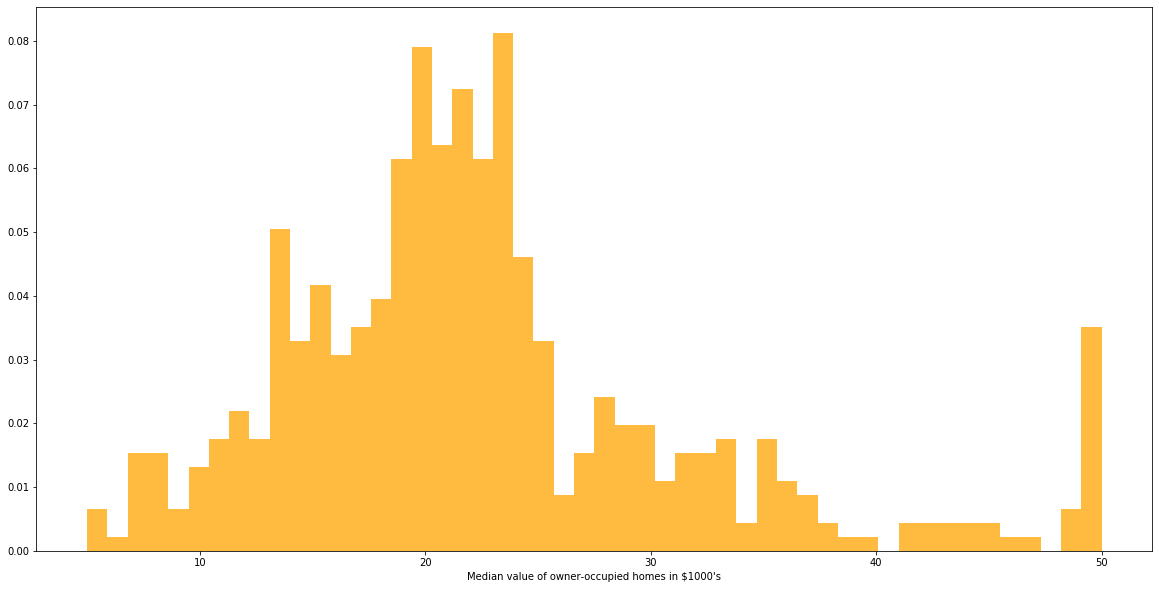

In [9]:
n, bins, patches = plt.hist(medval, 50, normed=1, facecolor='orange', alpha=0.75)
plt.xlabel("Median value of owner-occupied homes in $1000's")

(0, 2)

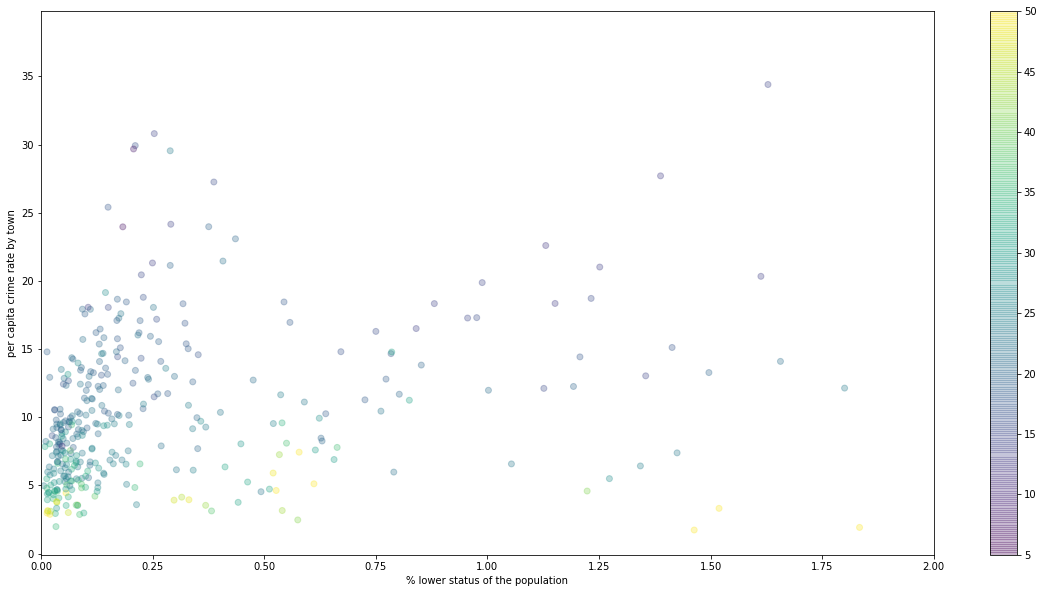

In [10]:
s = plt.scatter(X[:,0], X[:,1], c=medval, alpha=0.3)
plt.colorbar(s)
plt.xlabel("% lower status of the population")
plt.ylabel("per capita crime rate by town")
plt.xlim(0, 2)

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

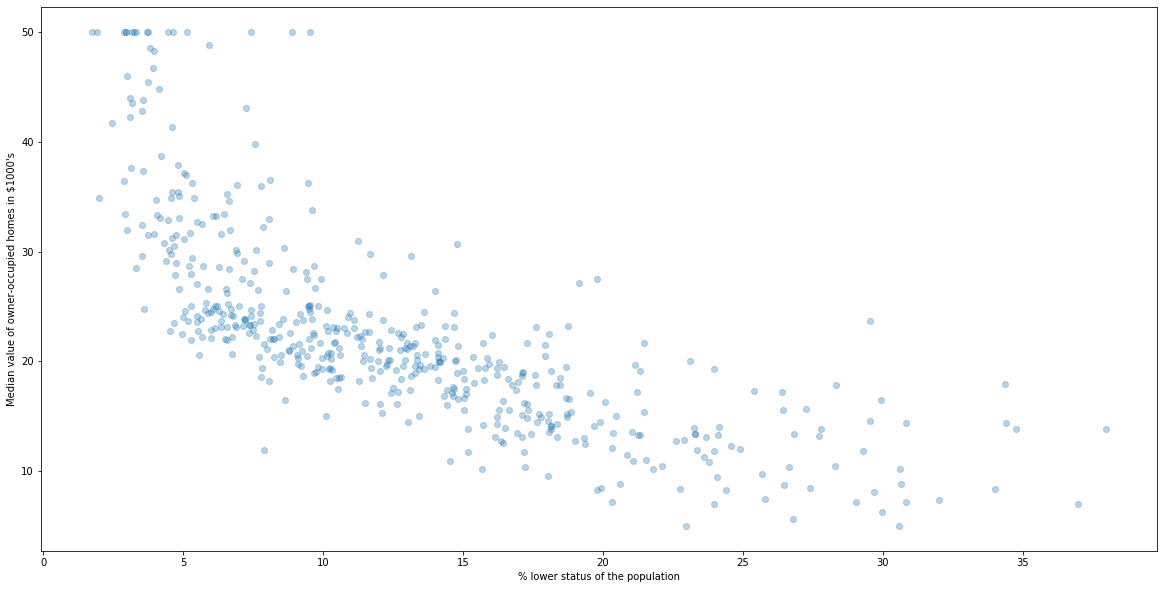

In [11]:
plt.scatter(X[:,1], medval, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

## Regresion

In [12]:
# define target:
y = medval

In [13]:
# just to print it nicely
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['medval'] = y
df.head()

,CRIM,LSTAT,medval
0,0.00632,4.98,24.0
1,0.02731,9.14,21.6
2,0.02729,4.03,34.7
3,0.03237,2.94,33.4
4,0.06905,5.33,36.2


In [14]:
# translate numpy to torch's objects
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y).float()

In [15]:
# predefined linear model (no activation funcion)
model = nn.Linear(in_features=2, out_features=1, bias=True)

In [16]:
model.weight

Parameter containing:
tensor([[-0.4897, -0.4435]], requires_grad=True)

In [17]:
### Choose loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## How to update weights

In [18]:
# Zero gradients (just in case)
optimizer.zero_grad()

# Forward pass, calculate predictions
output = model(X_torch)
output[:5, 0]

tensor([-2.5578, -4.4133, -2.1467, -1.6657, -2.7438], grad_fn=<SelectBackward>)

In [19]:
# Calculate loss
loss = criterion(output, y_torch.unsqueeze(1))

In [20]:
## Backward propagation
loss.backward()
model.weight.grad

tensor([[-254.4738, -741.5737]])

In [21]:
## Upade weights
optimizer.step()
model.weight

Parameter containing:
tensor([[2.0550, 6.9722]], requires_grad=True)

## Logistic Regression

In [22]:
y = medval > 25 # if a 

In [23]:
# just for showing data
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


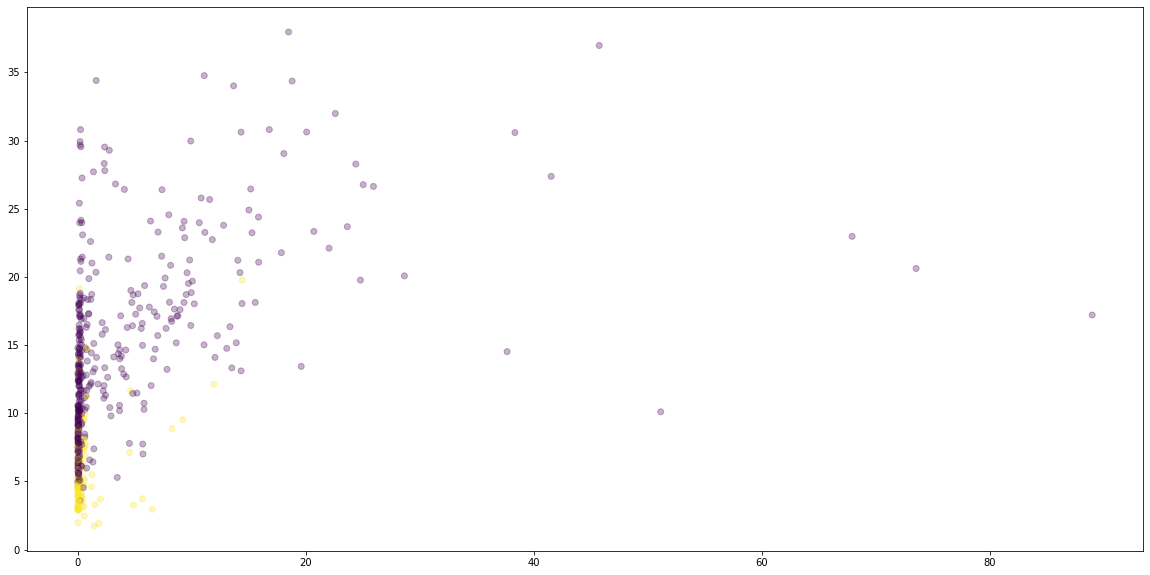

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
#plt.xlim(0, 2)

## Logistic regression: the simples NN

In [25]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [26]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [27]:
model.fc.weight

Parameter containing:
tensor([[0.3573, 0.3170]], requires_grad=True)

In [28]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [29]:
## zero gradients
optimizer.zero_grad()

In [30]:
## forward pass
output = model.forward(X_torch[:32, :])

In [31]:
## calculate loss
loss = criterion(output, y_torch[:32].unsqueeze(1))

In [32]:
## backward propagation
loss.backward()
model.fc.weight.grad

tensor([[ 0.5574, 12.1300]])

In [33]:
## updating weights
optimizer.step()

In [34]:
model.fc.weight

Parameter containing:
tensor([[ 0.3016, -0.8960]], requires_grad=True)